# Matplotlib

* Jake VanderPlas. 2016. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc.
* Chapter 4 - Visualization with Matplotlib
* https://github.com/jakevdp/PythonDataScienceHandbook
* **NOTE:** many code-examples are deprecated

Matplotlib provides:

* Easy and customizable type of plots (line, scatter, bars, histogram, contour, 3D...)
* Integration with NumPy and Pandas
* Extensible rendering using third-party libraries (Seaborn or Plotly)
* Different output formats
   * Static (`%matplotlib inline`): PNG, JPG, SVG, PDF
   * Interactive (`%matplotlib notebook`): Qt, Tkinter and WebAgg backends 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the default figure size in inches (width, height)
mpl.rcParams['figure.figsize'] = (5.33,4)
# Set the default font sizes for axes ant tick labels in points
mpl.rcParams['axes.labelsize'] = 10  # Example: 14 points
mpl.rcParams['xtick.labelsize'] = 8  # Example: 12 points for x-axis ticks
mpl.rcParams['ytick.labelsize'] = 8  # Example: 12 points for y-axis ticks

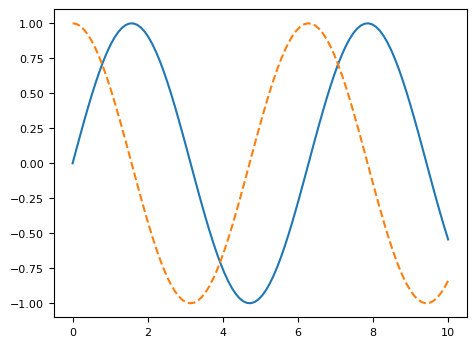

In [2]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Dual Interface

* MATLAB-style Interface
   * Matplotlib: Python alternative for MATLAB
   * Use `plt` for almost everything
   * Convenient for simple plots
* Object-oriented interface
   * Create objects and call methods on them
   * More flexible

MATLAB-style Interface:<br><br>

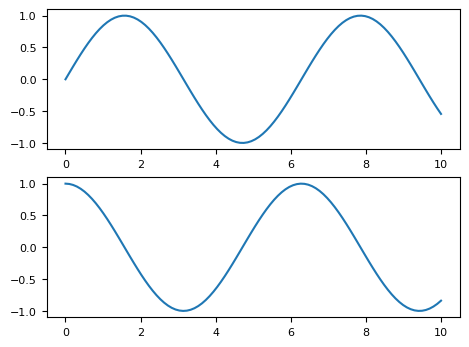

In [3]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Object-oriented Interface:<br><br>

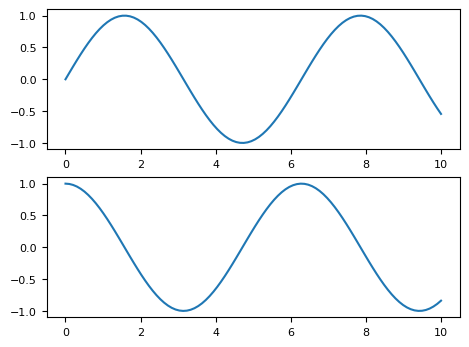

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Styles

* Predefined collection of visual attributes
* `plt.style.library` &rarr; available styles an their parameters
   * `plt.style.available` == `sorted(plt.style.library.keys())` 
* `plt.style.use('stylename')` &rarr; set global style
   * Use context manager to chancge the style locallY:
   * ```python
     with plt.style.context('stylename'):
         make_a_plot()
     ```

In [5]:
def hist_and_lines(title="Default style"):
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')
    fig.suptitle(title)

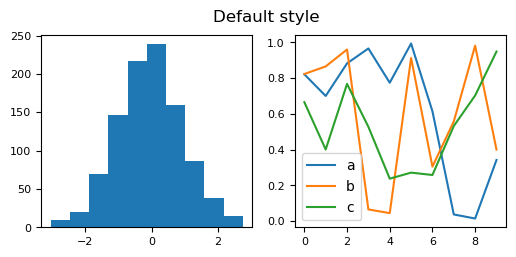

In [6]:
hist_and_lines()

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

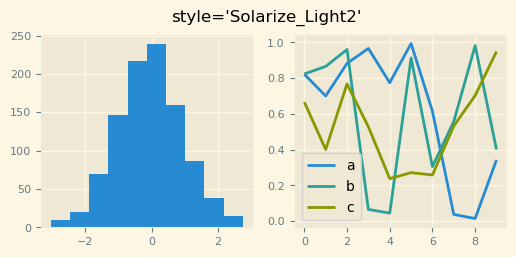

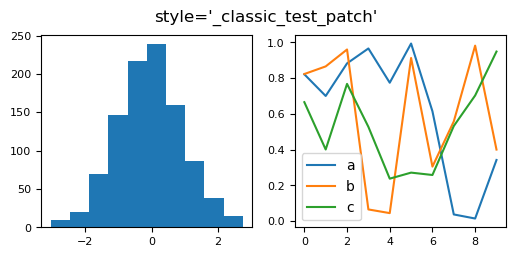

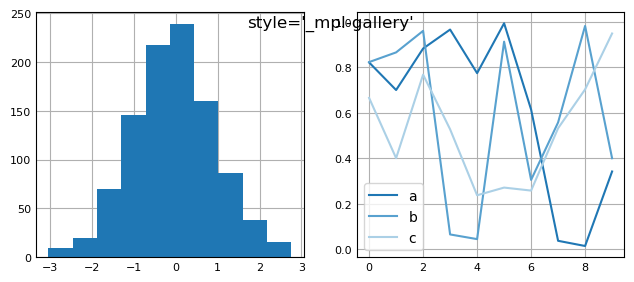

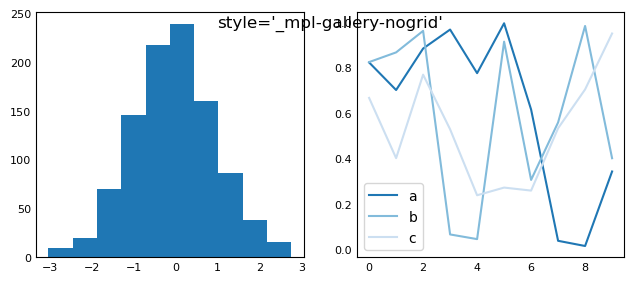

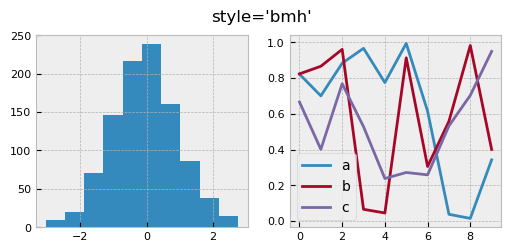

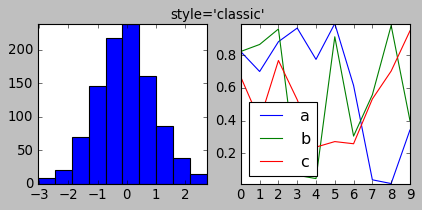

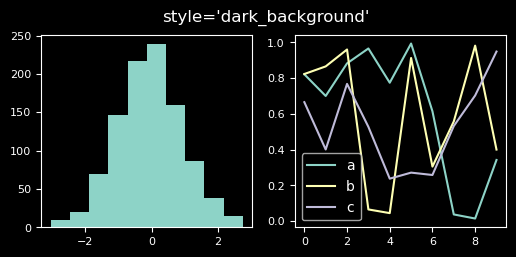

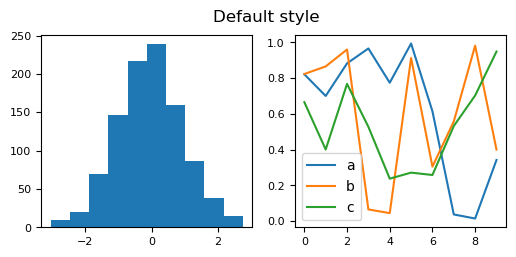

In [8]:
for style in plt.style.available[:7] :
    with plt.style.context(style):
        hist_and_lines(f'{style=}')
hist_and_lines()

### Seaborn Styles

* Five styles: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`
* `sns.set_style(stylename)` &rarr; set global style
   * Use context manager to chancge the style locallY:
   * ```python
     with sns.axes_style(stylename):
         make_a_plot()
     ```

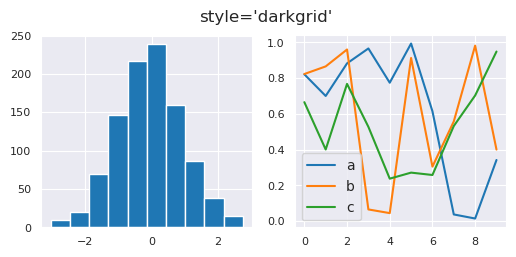

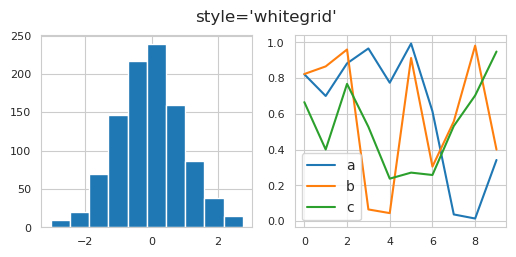

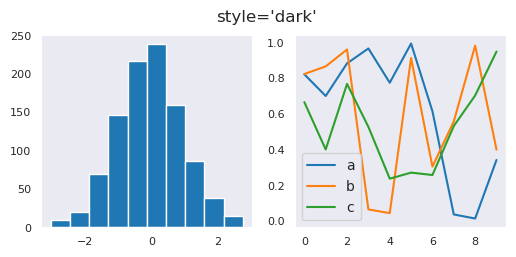

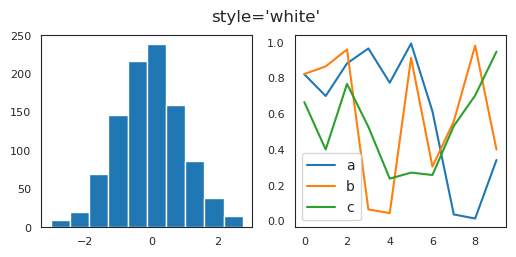

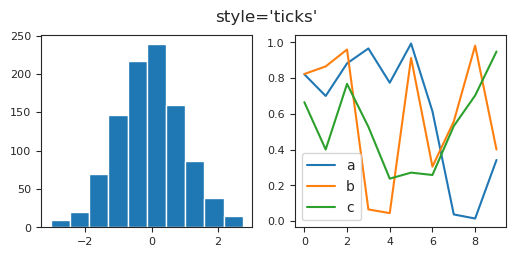

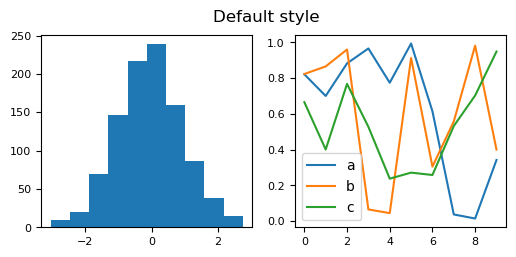

In [9]:
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] :
    with sns.axes_style(style):
        hist_and_lines(f'{style=}')
hist_and_lines()

* `sns.set()` == `sns.set_theme()` &rarr; sns.set_style('darkgrid') and more

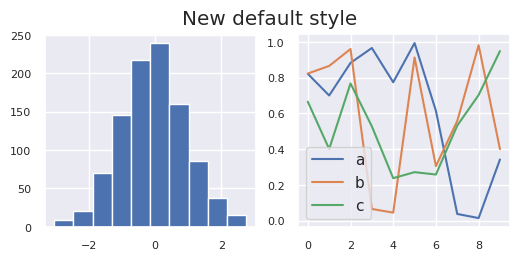

In [10]:
sns.set()
mpl.rcParams['figure.figsize'] = (5.33,4)
mpl.rcParams['axes.labelsize'] = 10  # Example: 14 points
mpl.rcParams['xtick.labelsize'] = 8  # Example: 12 points for x-axis ticks
mpl.rcParams['ytick.labelsize'] = 8  # Example: 12 points for y-axis ticks
hist_and_lines("New default style")

### Line, Axes and Label properties

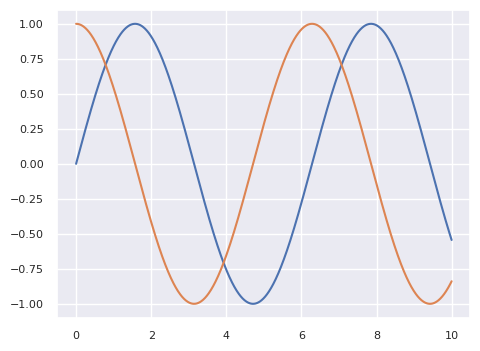

In [11]:
x = np.linspace(0, 10, 1000)
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

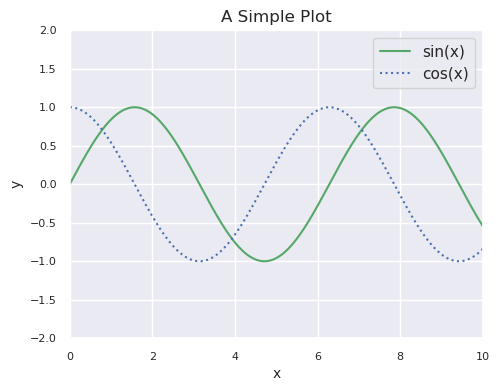

In [12]:
x = np.linspace(0, 10, 1000)
ax = plt.axes()
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='y',
       title='A Simple Plot')
plt.legend();

## Scatter Plots

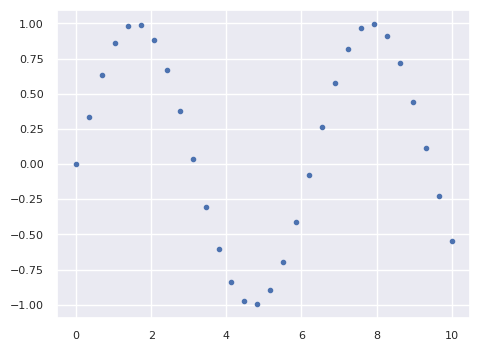

In [13]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
#plt.plot(x, y);     # default: '-' use lines
plt.plot(x, y, '.'); # use point as marker

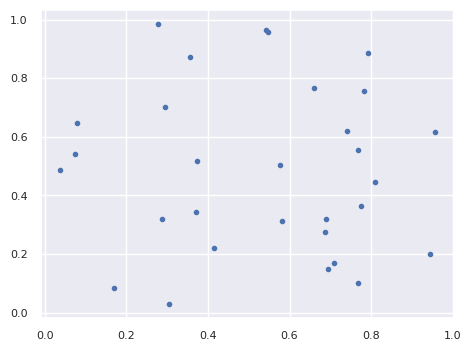

In [14]:
x,y  = np.random.rand(2,30)
#plt.plot(x, y);     # default: '-' use lines
plt.plot(x, y, '.'); # use point as marker

* `scatter(x, y, s=, c=, cmap=)` &rarr; scatter plot with individual size and color

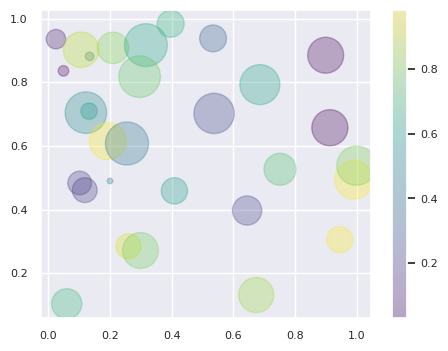

In [15]:
x,y,sizes,colors = np.random.rand(4,30)
plt.scatter(x, y, s=sizes*1000, alpha=0.3, c=colors, cmap='viridis')
plt.colorbar(); # show color scale

## Errorbars
* `plt.errorbar(x, y, yerr=)` &rarr; an error bar plot

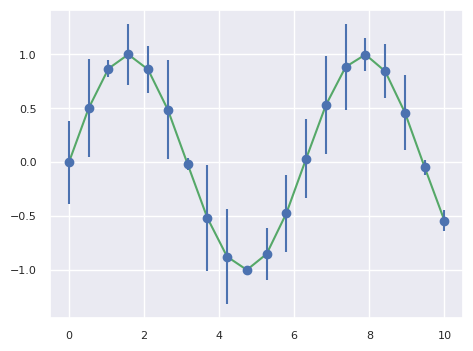

In [16]:
x = np.linspace(0, 10, 20)
y = np.sin(x)
dy = 0.5 * np.random.rand(x.size)
plt.plot(x, np.sin(x), 'g')
plt.errorbar(x, np.sin(x), yerr=dy, fmt='o');

## Histograms
* `plt.hist(x, bins=, density=, histtype=)` &rarr; a histogram plot

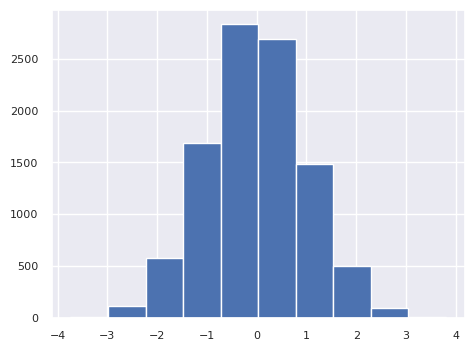

In [17]:
x = np.random.randn(10000)
plt.hist(x);

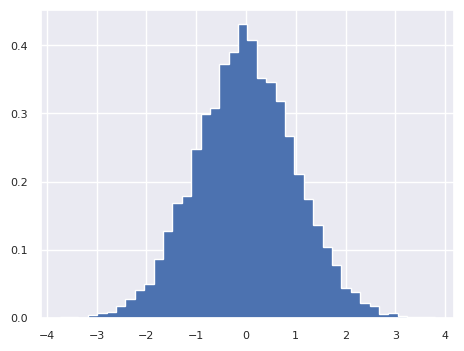

In [18]:
plt.hist(x, bins=40, density=True, histtype='stepfilled');

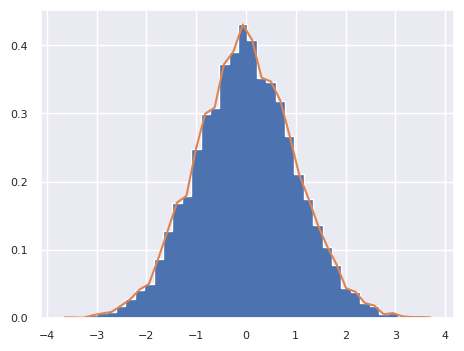

In [19]:
density, bins, patches = plt.hist(x, bins=40, density=True, histtype='stepfilled')
# Calculate the center of the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
# Plot the probability density as a line
plt.plot(bin_centers, density);

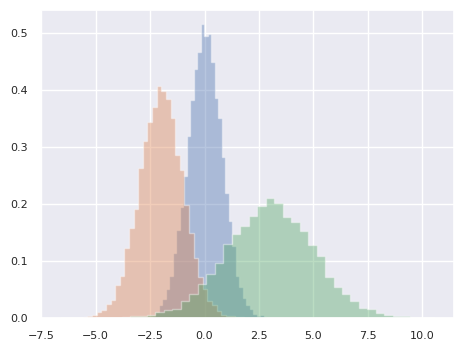

In [20]:
x1 = np.random.normal(0, 0.8, 10000)
x2 = np.random.normal(-2, 1, 10000)
x3 = np.random.normal(3, 2, 10000)
kwargs = dict(bins=40, density=True, histtype='stepfilled', alpha=0.4)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Seaborn
* Matplotlib predated Pandas by more than a decade
   * It is not designed for use with Pandas (is being updated)
* Seaborn provides an API on top of Matplotlib and integrates with Pandas
  * Statistical tools: regressions, errors and distributions
  * Simple multivariate visualization

In [21]:
a = np.random.multivariate_normal(mean=[0, 1], cov=[[5, 2], [2, 2]], size=2000)
df = pd.DataFrame(a, columns=['x', 'y'])
df.head()

,x,y
0,0.422732,0.152363
1,-0.733416,0.678723
2,-1.825696,0.841521
3,2.113652,1.340771
4,1.254496,1.035458


Plotting two histograms (<u>widths of the bins</u> differ) 

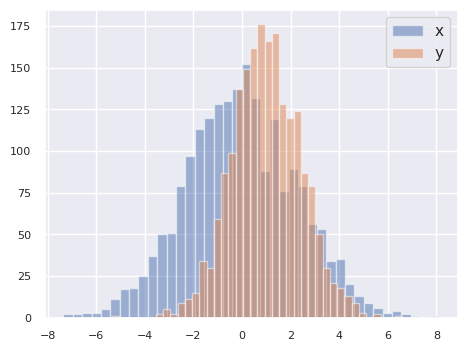

In [22]:
plt.hist(df['x'], bins=40, alpha=0.5, label='x')
plt.hist(df['y'], bins=40, alpha=0.5, label='y')
plt.legend();

Seaborn can plot the histograms of the DataFrame variables (<u>equal bin widths</u>):

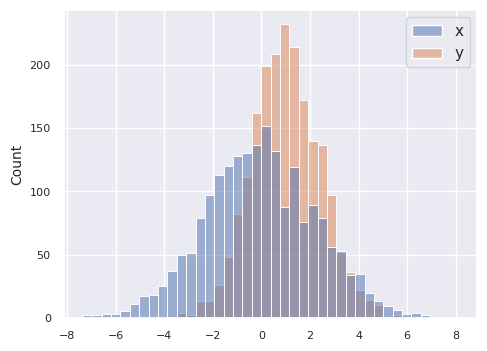

In [23]:
sns.histplot(df, bins=40);

Kernel density estimation of the DataFrame variables:

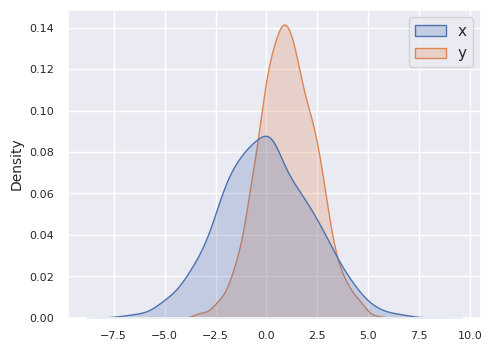

In [24]:
sns.kdeplot(df, fill=True);

Two-dimensional visualization of the kernel density estimation:

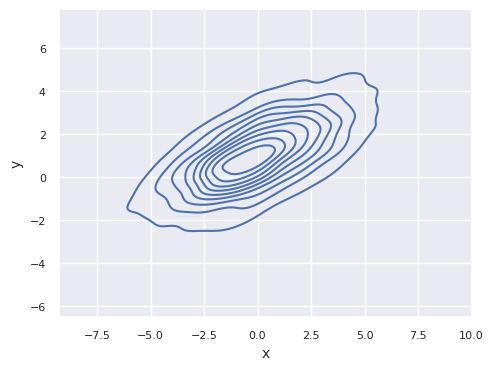

In [25]:
sns.kdeplot(df, x='x', y='y');

Joint and marginal distributions together:

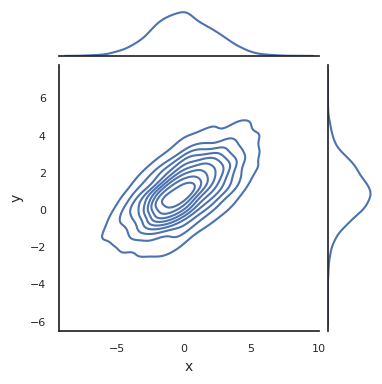

In [26]:
with sns.axes_style('white'):
    sns.jointplot(df, x='x', y='y', kind='kde', height=4);

Same but using an hexagonally based histogram instead:

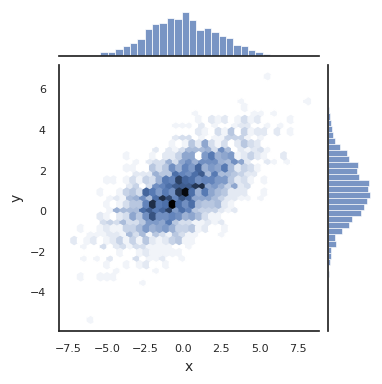

In [27]:
with sns.axes_style('white'):
    sns.jointplot(df, x='x', y='y', kind='hex', height=4);

### Multivariate visualization

**Iris** dataset: measurements of petals and sepals of three iris species: 

In [28]:
iris = sns.load_dataset("iris")
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The correlation matrix of the data:

In [29]:
iris.drop(['species'], axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


A heat map of the correlation matrix:

<Axes: >

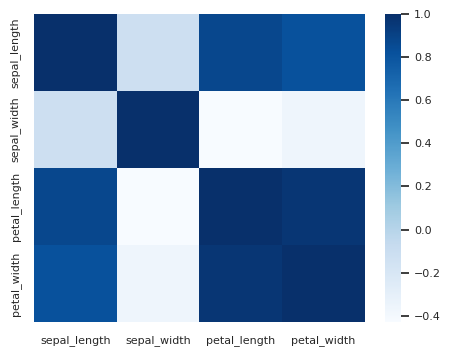

In [30]:
c = iris.drop(['species'], axis=1).corr()
sns.heatmap(c, cmap="Blues")

A heat map of the correlation matrix just for `setosa` specie:

<Axes: >

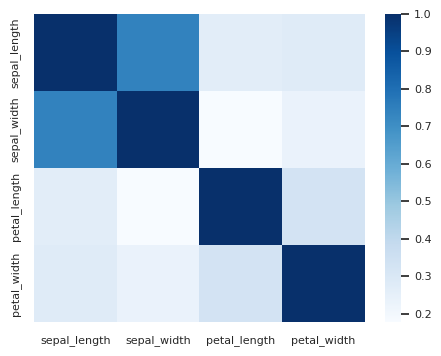

In [31]:
c = iris[iris['species']=='setosa'].drop('species', axis=1).corr()
sns.heatmap(c, cmap="Blues")

Same but using the `species` variable as index:

<Axes: >

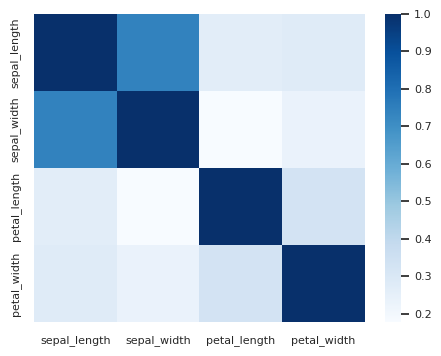

In [32]:
c = iris.set_index('species').loc['setosa'].corr()
sns.heatmap(c, cmap="Blues")

Correlation matrix for each specie:

In [33]:
iris.groupby('species').corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

Correlation matrix heat map for each specie:

<Axes: ylabel='species-None'>

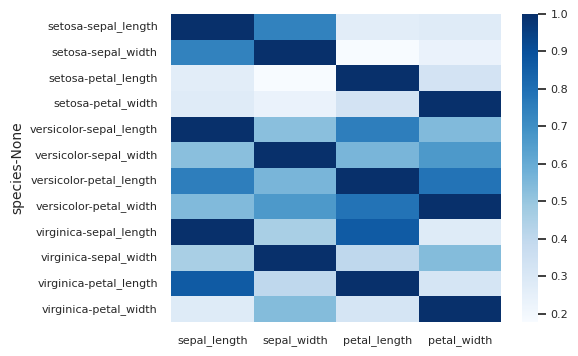

In [34]:
sns.heatmap(iris.groupby('species').corr(),cmap="Blues")

Plot with pair-wise scatter plots and kde: 

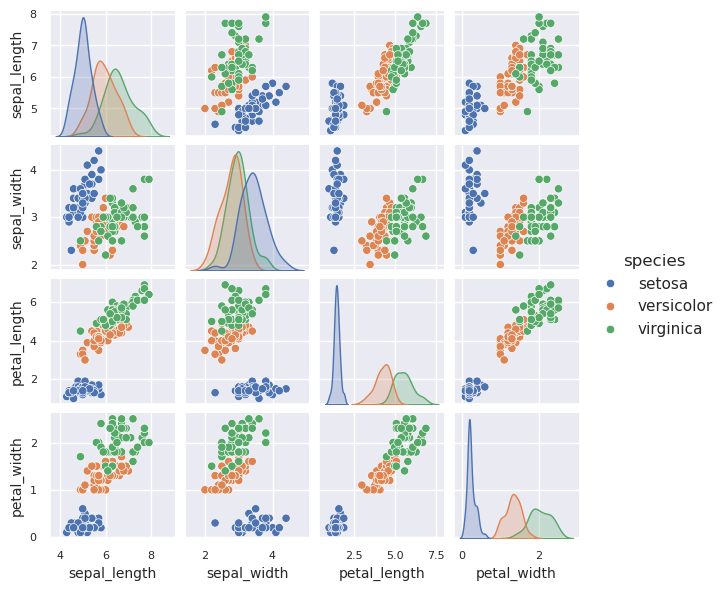

In [35]:
sns.pairplot(iris, hue='species', height=1.5);